# Lead Scoring Problem

## Process Flow

1. Understanding Problem Statement
2. Hypothesis Generation
3. Getting the system ready and loading the data
4. Understanding the data
5. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
6. Missing Value and Outlier Treatment
7. Evaluation Metrics for classification problems
8. Model Building Part-I
9. Logistics regression using stratified k-folds cross validation
10. Feature Engineering
11. Model Building Part-II
    Logistic Regression
    Decision Tree
    Random Forest
    XGBoost



## 1. Understanding Problem Statement

A lead is someone who has shown an interest in a particular product and is very likely to buy the product. 

Lead is captured in 2 ways: Direct and Indirect ways. 

Direct ones are captured by the users filling out the form. Indirect ones are captured by the users who have not filled out the form but visited the page. You are provided with the direct leads who filled out the forms.

Lead is captured from the forms. Any user who fills out the form is known as a lead. Identifying the potential leads beforehand will help us to prioritize the leads and pitch our product to these users first. 

Potential leads have a higher chance of buying the product compared to other leads. We can identify the potential leads by assigning every lead a score.


The objective of the problem is to build a smart system to assign a score to the user based on his user journey

## 2. Hypothesis Generation

Hypothesis generation is an important step in building a lead scoring model. It involves formulating initial assumptions or hypotheses about the factors that may contribute to the likelihood of a lead converting into a customer. Here's an example of hypothesis generation for a lead scoring model:

- Hypothesis 1: Form Type Hypothesis
    - Leads generated from specific form types (e.g., demo request, pricing inquiry) are more likely to convert into customers compared to other form types.

- Hypothesis 2: User Experience Hypothesis
    - Leads with a higher level of user experience (e.g., advanced users, power users) are more likely to convert into customers compared to leads with lower levels of user experience.

- Hypothesis 3: UTM Source Hypothesis
    - Leads coming from specific UTM sources (e.g., organic search, referral traffic) have a higher conversion rate compared to leads from other sources.

- Hypothesis 4: Lead Vintage Hypothesis
    - Leads that have been in the system for a longer time (higher lead vintage) are more likely to convert into customers compared to newly acquired leads.

- Hypothesis 5: Engagement Hypothesis
    - Leads that have a higher number of interactions (e.g., page visits, email opens) with the company's website or - marketing materials are more likely to convert into customers.

- Hypothesis 6: Demographic Hypothesis
    - Leads from specific demographic segments (e.g., age group, location, industry) have a higher propensity to convert into customers compared to leads from other segments.

- Hypothesis 7: Lead Rate Hypothesis
    - Leads with a higher lead rate (more frequent lead generation) are more likely to convert into customers compared to leads with a lower lead rate.

Hypotheses can be further validated and refined through data analysis and model training to build an effective lead scoring system.

## 3. Getting the system ready and loading the data

In [5]:
#Loading packages

import pandas as pd
import numpy as np                   # For mathematical calculations
import seaborn as sns                # For Data Visualization
import matplotlib.pyplot as plt      # For plotiing graphs
%matplotlib inline
import warnings                      # To ignore any warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading Data

data = pd.read_csv('data.csv')

## 4. Understanding the Data

In [7]:
# Features  present in our data

data.columns

Index(['created_at', 'subdomain', 'ext', 'country_code', 'form_type',
       'experience', 'utm_source', 'utm_medium', 'is_signedup', 'vintage',
       'weekday', 'quarter', 'is_weekend', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', '#leads', 'lead_rate', 'form_1',
       'form_6', 'form_7', 'form_2', 'form_3', 'form_4', 'form_5', 'form_8',
       'form_9', 'form_10', 'form_11', 'form_12', 'form_13', 'form_14',
       'form_15', 'buy'],
      dtype='object')

### Feature  Description

- Created_at: date and time at which lead was dropped 
- Subdomain: domain of the email id 
-  Ext: extension of the email id 
-  Country_code: country code of the user
- Form_type: type of the form through which the user has dropped a lead 
-  Experience: experience of the user
- Utm_source: UTM source of the lead
- Utm_medium: UTM medium of the lead 
- Is_signedup: boolean flag indicating if the user has signed up while dropping the lead 
-  vintage: vintage of the user
- DateTime features:
- weekday
-  quarter
- is_weekend
-  is_month_start
-  is_month_end 
- is_quarter_start 
- is_quarter_end 
- #leads: no. of leads dropped in the last 3 months
- lead_rate: no. of leads/time 
- Form_{1-15}: no. of leads dropped through different forms 
- buy: target variable indicating if the user has bought the product in the next 90 days after dropping the lead

In [9]:
# Data Info- Data Types, Null Values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60295 entries, 0 to 60294
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   created_at        60295 non-null  object 
 1   subdomain         60295 non-null  object 
 2   ext               60295 non-null  object 
 3   country_code      60295 non-null  object 
 4   form_type         60295 non-null  object 
 5   experience        60295 non-null  object 
 6   utm_source        60295 non-null  object 
 7   utm_medium        60295 non-null  object 
 8   is_signedup       60295 non-null  bool   
 9   vintage           60295 non-null  int64  
 10  weekday           60295 non-null  int64  
 11  quarter           60295 non-null  int64  
 12  is_weekend        60295 non-null  int64  
 13  is_month_start    60295 non-null  bool   
 14  is_month_end      60295 non-null  bool   
 15  is_quarter_start  60295 non-null  bool   
 16  is_quarter_end    60295 non-null  bool  

In [10]:
# Data Eyeballing

data.head()

,created_at,subdomain,ext,country_code,form_type,experience,utm_source,utm_medium,is_signedup,vintage,...,form_5,form_8,form_9,form_10,form_11,form_12,form_13,form_14,form_15,buy
0,2021-01-01 7:26:01,hotmail,com,combined,form_1,Fresher,source_1,medium_1,False,-1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 10:38:59,gmail,com,91,form_2,Fresher,source_1,medium_1,True,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 10:46:46,gmail,com,91,form_3,Fresher,source_1,medium_2,True,7,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 11:51:01,gmail,com,91,form_4,Fresher,source_2,medium_3,False,-1,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 13:21:47,gmail,com,1,form_1,Fresher,source_1,medium_1,True,166,...,0,0,0,0,0,0,0,0,0,0


## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features, we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

#### Target variable (buy)

In [13]:
data['buy'].value_counts(normalize=True)

0    0.983597
1    0.016403
Name: buy, dtype: float64

<AxesSubplot:>

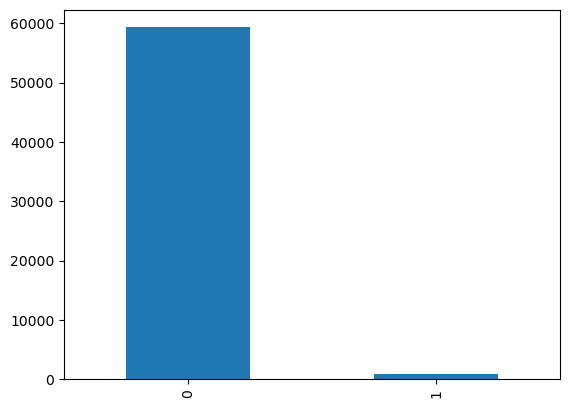

In [16]:
data['buy'].value_counts().plot.bar()

##### Inference
**98.3597%** have not bought any product i.e. **Only 1.64%** leads are successful.

#### Categorical Variable(Independent)

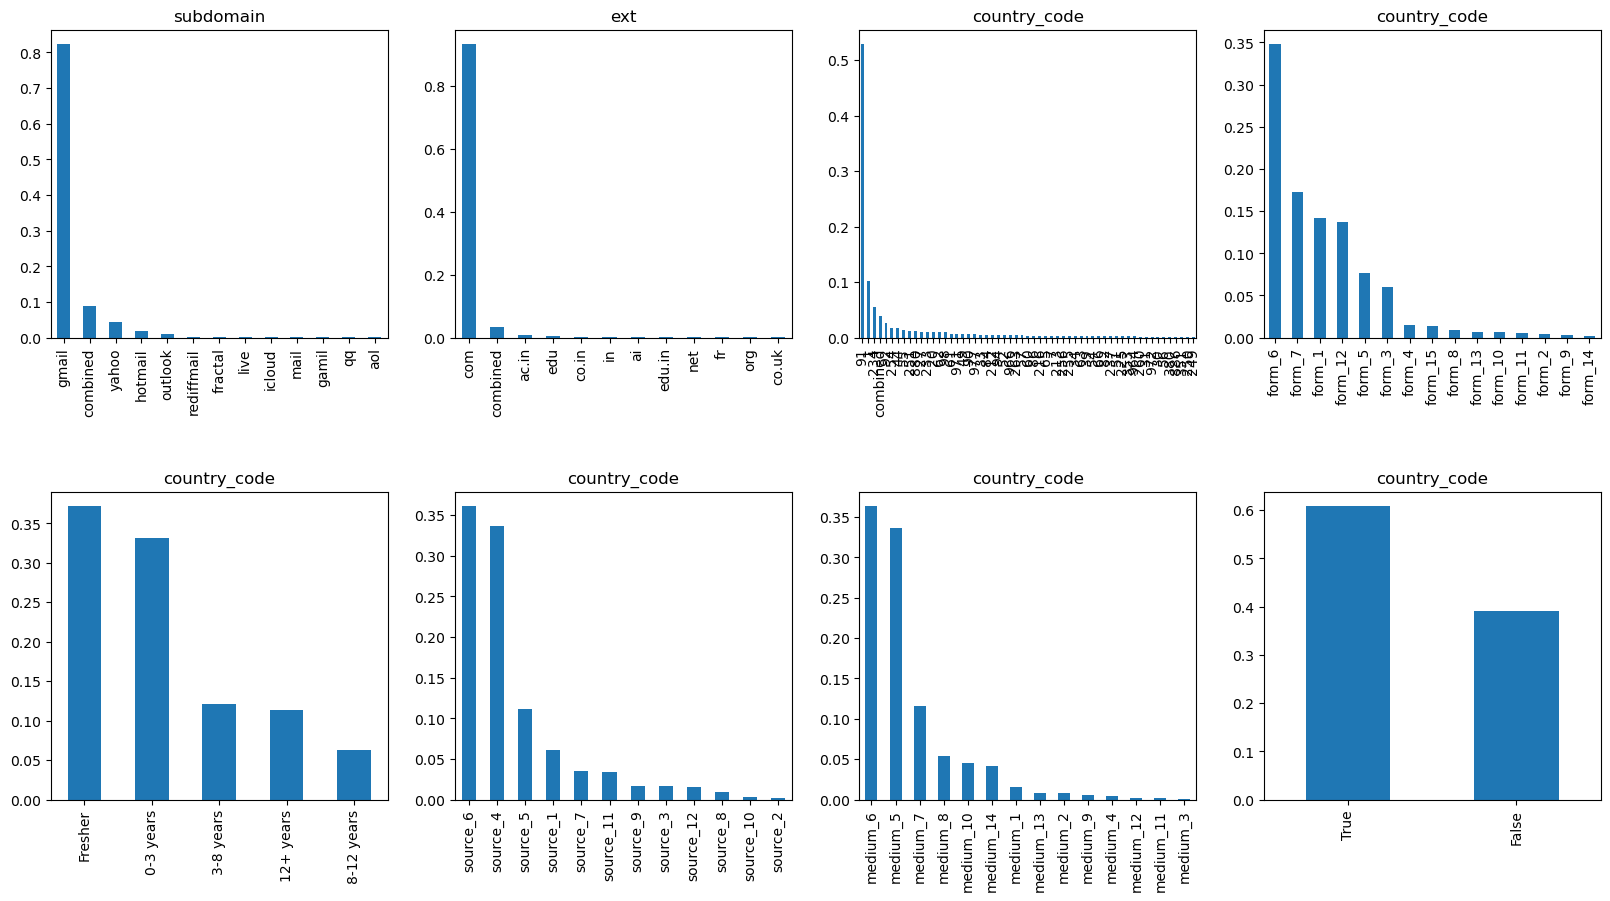

In [31]:
plt.figure(1)
plt.subplot(241)
data['subdomain'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='subdomain')
plt.subplot(242)
data['ext'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='ext')
plt.subplot(243)
data['country_code'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='country_code')
plt.subplot(244)
data['form_type'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='form_type')
plt.subplot(245)
data['experience'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='experience')
plt.subplot(246)
data['utm_source'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='utm_source')
plt.subplot(247)
data['utm_medium'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='utm_medium')
plt.subplot(248)
data['is_signedup'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='is_signedup')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

##### Inference

- **~ 82%** are  gmail users. Also, there might be typo error in gamil
- **~ 93%** are .com users
- **~ 51%** are from country_code 91 (India) and **~ 10%** from country code 1(USA)
- **~ 34%** users from form_6, **~ 17%** from form_7, **~ 14%** from form_, **~ 12%** from form_12, **~ 7%** from form_5 and **~ 6%** from form_3
- **~ 37%** users are Fresher, **~ 33%** are 0-3 years experience, **~ 12%** are 3-8 years experience and **~ 11%** are 12+ years experience
- **~ 36%** users are from source_6, **~ 33%** users are from source_4 and **~ 11%** users are from source_5 
- **~ 36%** users are from medium_6, **~ 33%** users are from medium_5 and **~ 11%** users are from medium_7
- **~ 60%** users are signedup users.

#### Numerical Variable(Independent)

In [39]:
data['vintage'].value_counts(normalize=True)

-1       0.391774
 0       0.007215
 1       0.004412
 2       0.003483
 5       0.003367
           ...   
 2119    0.000017
 2510    0.000017
 2508    0.000017
 2351    0.000017
 2443    0.000017
Name: vintage, Length: 2358, dtype: float64

##### Inference
**-1** is not a feasible value here. It accounts for **39%**

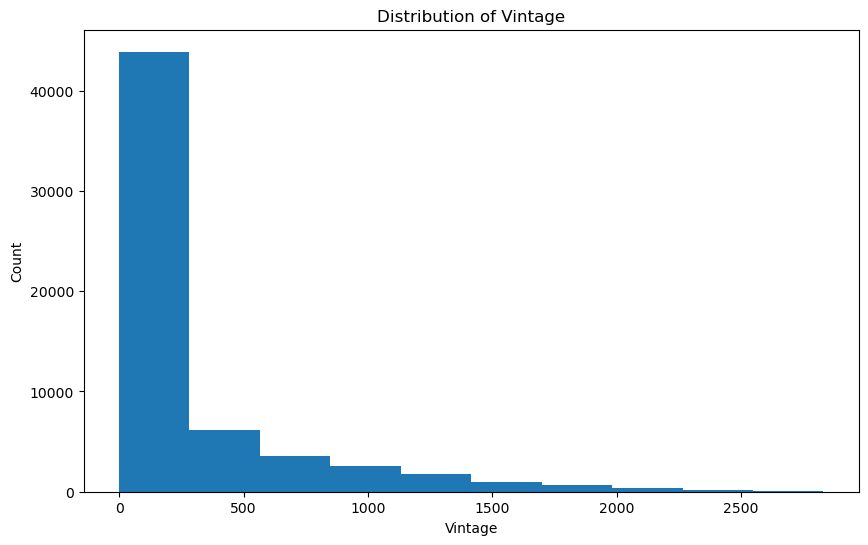

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(data['vintage'], bins=10)
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Distribution of Vintage')
plt.show()

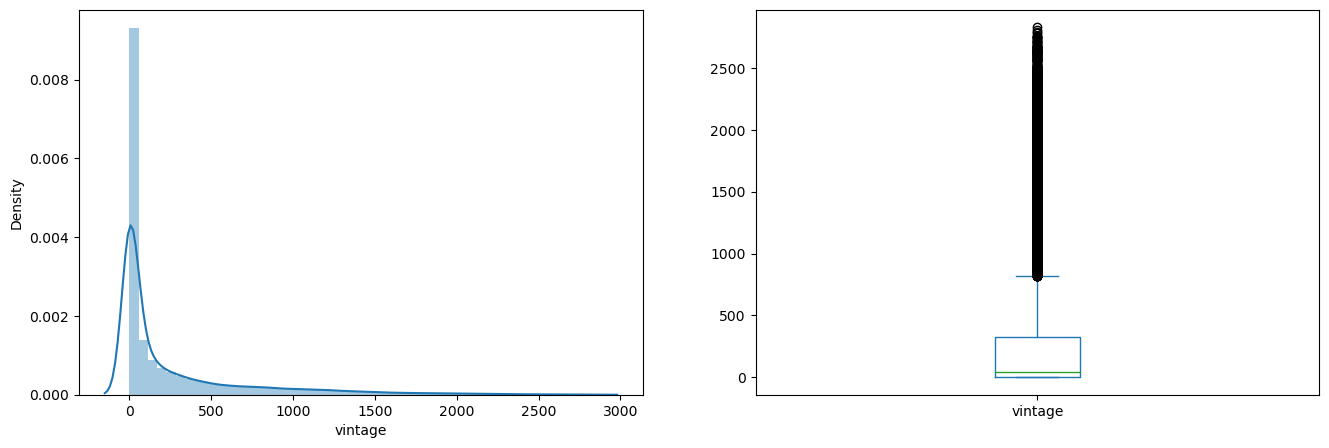

In [49]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['vintage'])
plt.subplot(122)
data['vintage'].plot.box(figsize=(16,5))
plt.show()

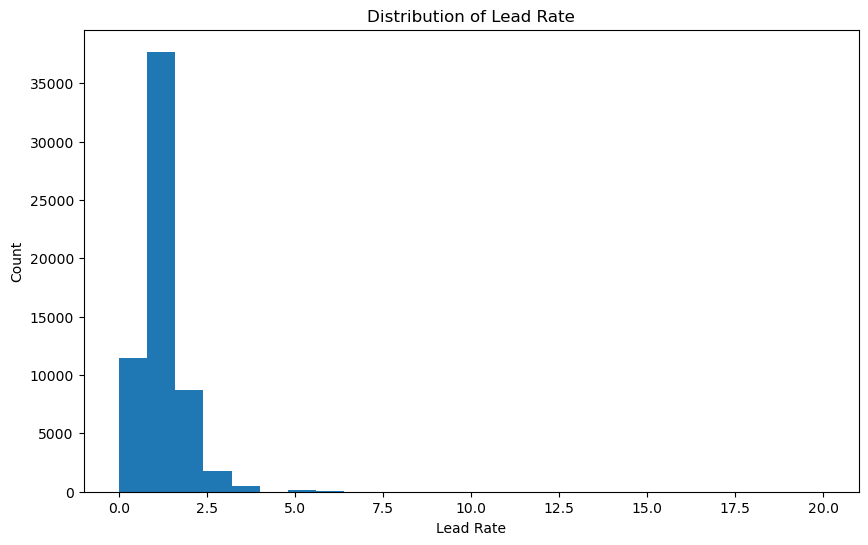

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(data['lead_rate'], bins=25)
plt.xlabel('Lead Rate')
plt.ylabel('Count')
plt.title('Distribution of Lead Rate')
plt.show()

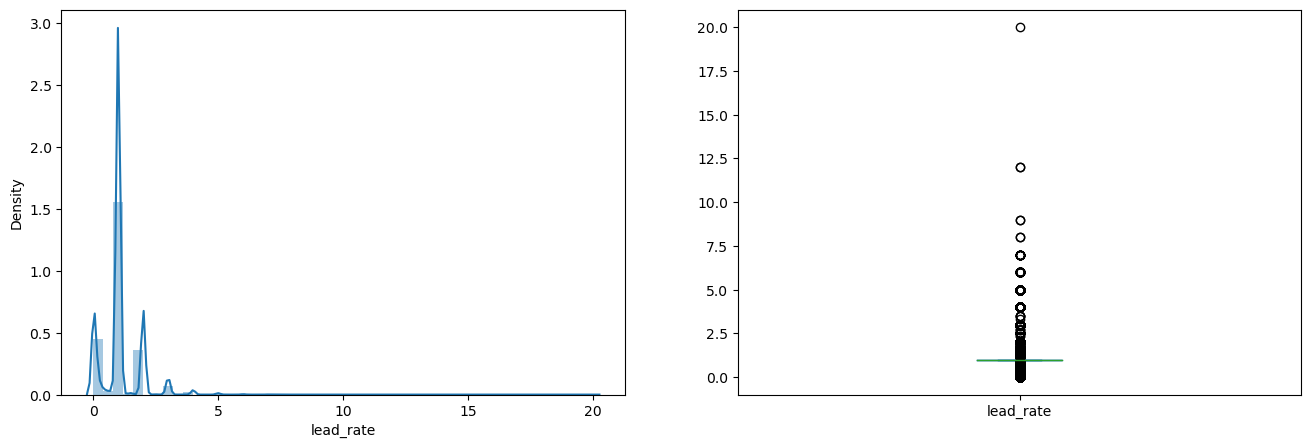

In [50]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['lead_rate'])
plt.subplot(122)
data['lead_rate'].plot.box(figsize=(16,5))
plt.show()

##### Inference



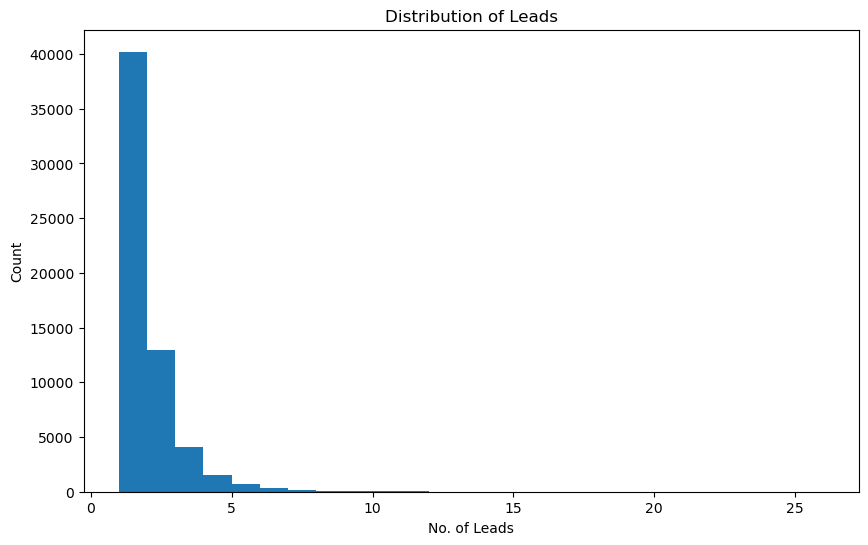

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(data['#leads'], bins=25)
plt.xlabel('No. of Leads')
plt.ylabel('Count')
plt.title('Distribution of Leads')
plt.show()

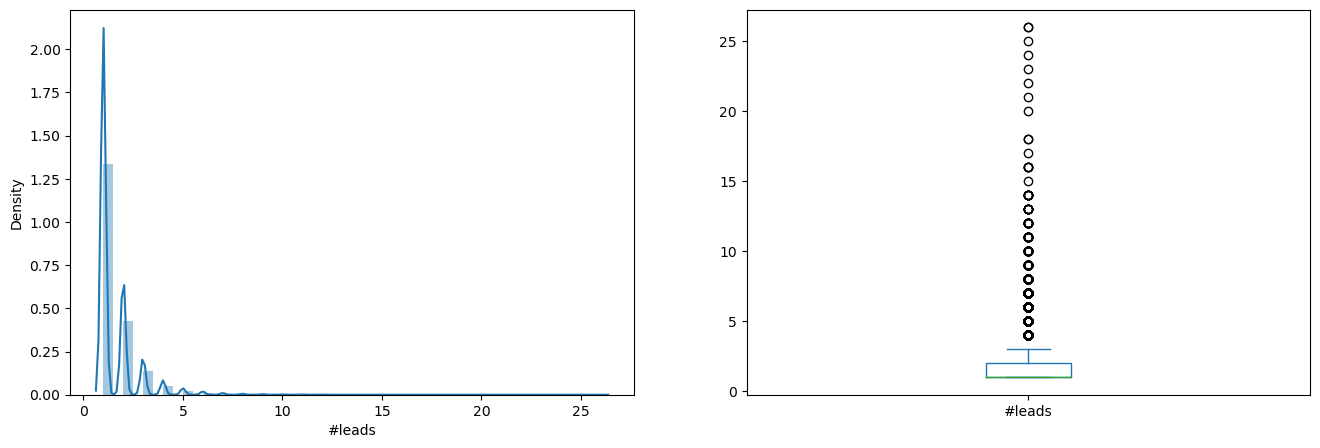

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['#leads'])
plt.subplot(122)
data['#leads'].plot.box(figsize=(16,5))
plt.show()

##### Inference


### 5.2 Bivariate Analysis

#### Categorical Independent Variable Vs Target Variable


In [54]:
Subdomain= pd.crosstab(data['subdomain'],data['buy'])
Subdomain

buy,0,1
subdomain,,
aol,73,0
combined,5237,42
fractal,165,0
gamil,98,0
gmail,48776,860
hotmail,1109,13
icloud,118,0
live,141,3
mail,104,0


In [56]:
Subdomain.div(Subdomain.sum(1).astype(float), axis=0)

buy,0,1
subdomain,,
aol,1.000000,0.000000
combined,0.992044,0.007956
fractal,1.000000,0.000000
gamil,1.000000,0.000000
gmail,0.982674,0.017326
hotmail,0.988414,0.011586
icloud,1.000000,0.000000
live,0.979167,0.020833
mail,1.000000,0.000000


<AxesSubplot:xlabel='subdomain'>

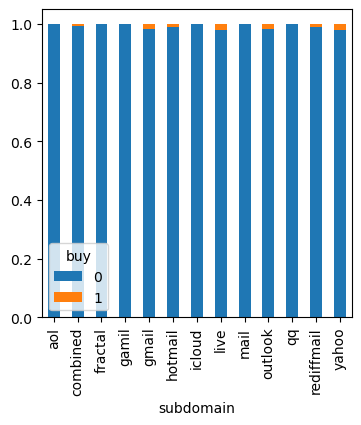

In [57]:
Subdomain.div(Subdomain.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, figsize=(4,4))

##### Inference 

<AxesSubplot:xlabel='utm_medium'>

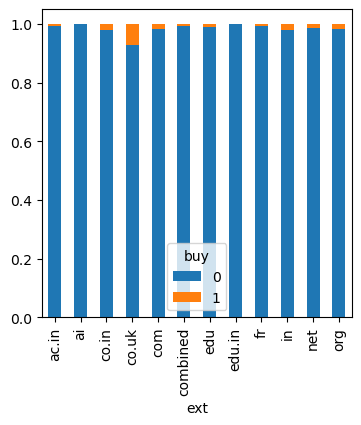

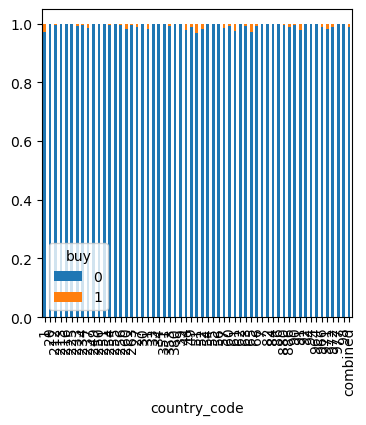

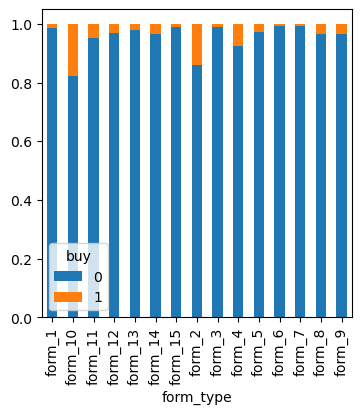

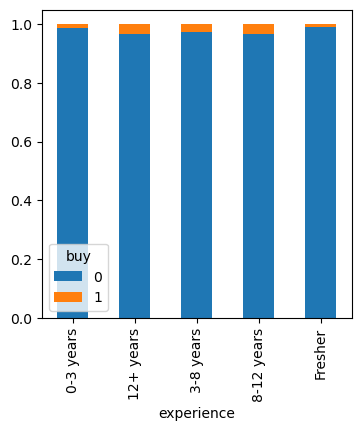

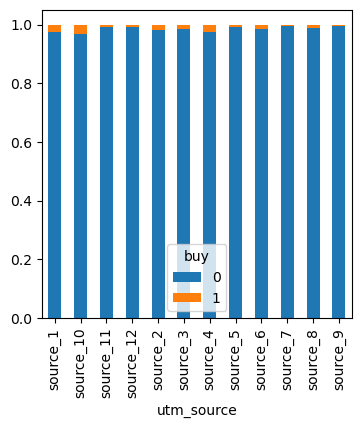

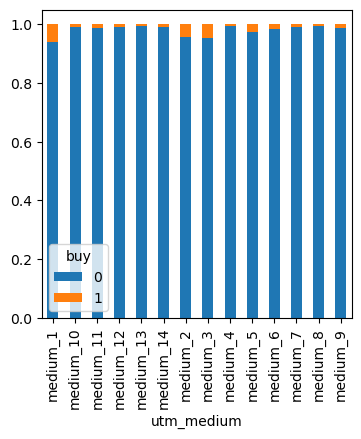

In [58]:
Ext = pd.crosstab(data['ext'],data['buy'])
Country_code = pd.crosstab(data['country_code'],data['buy'])
Form_Type = pd.crosstab(data['form_type'],data['buy'])
Experience = pd.crosstab(data['experience'],data['buy'])
Utm_source =pd.crosstab(data['utm_source'],data['buy'])
Utm_medium = pd.crosstab(data['utm_medium'],data['buy'])
SignUp =pd.crosstab(data['is_signedup'],data['buy'])

Ext.div(Ext.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Country_code.div(Country_code.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Form_Type.div(Form_Type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Experience.div(Experience.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Utm_source.div(Utm_source.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Utm_medium.div(Utm_medium.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

##### Inference

#### Numerical Independent Variable Vs Target Variable


<AxesSubplot:xlabel='buy'>

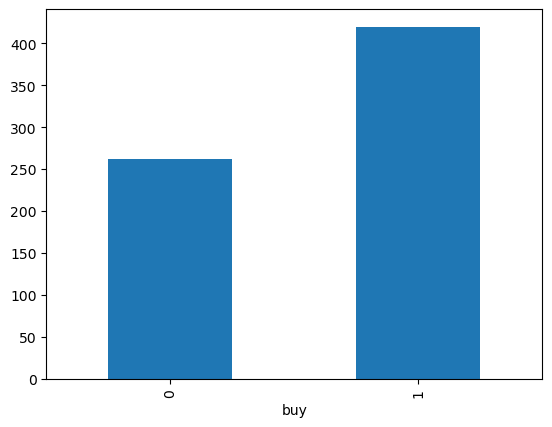

In [60]:
data.groupby('buy')['vintage'].mean().plot.bar()

##### Inference 

<AxesSubplot:xlabel='buy'>

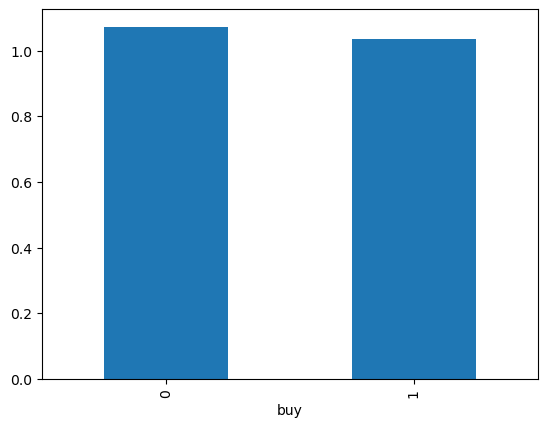

In [61]:
data.groupby('buy')['lead_rate'].mean().plot.bar()

<AxesSubplot:xlabel='buy'>

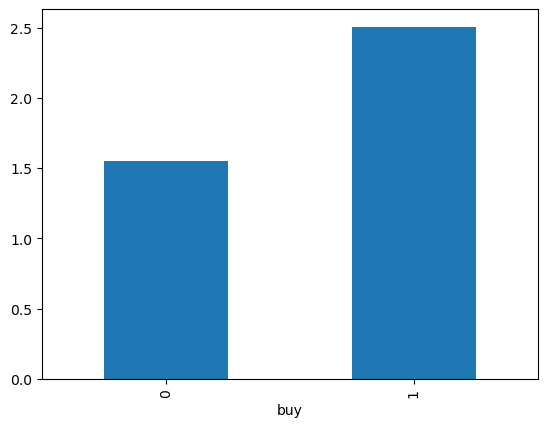

In [62]:
data.groupby('buy')['#leads'].mean().plot.bar()

##### Inference

<AxesSubplot:>

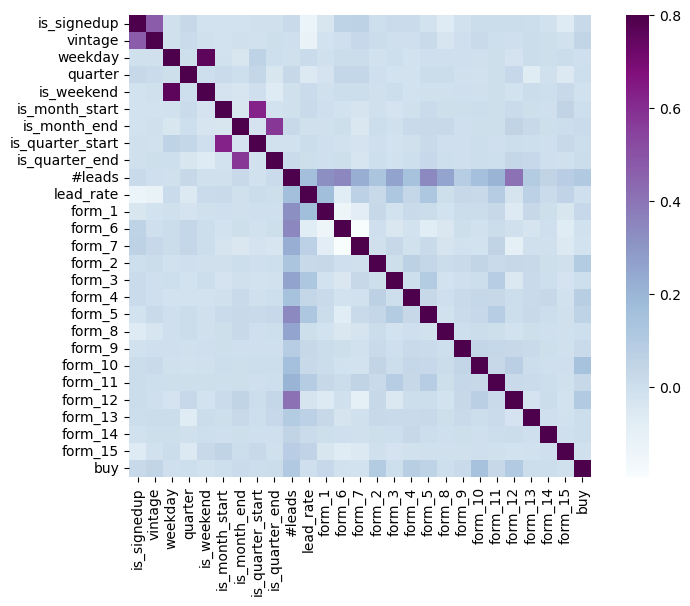

In [63]:
matrix=data.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

##### Inference

## 6. Missing Value and Outlier Treatment

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Exploration and Preprocessing
# Load the dataset
data = pd.read_csv('data.csv')

# Handle missing values and outliers

# Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding)

# Split the dataset into training and testing sets
X = data.drop('buy', axis=1)  # Features
y = data['buy']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Engineering (if required)
# Extract insights from existing features

# Engineer new features if necessary

# Scale or normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Additional steps as per your specific requirements


ValueError: could not convert string to float: '2021-08-28 11:30:53'

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('data.csv')

# Drop any columns that are not required for the analysis
data = data.drop(columns=['created_at', 'subdomain', 'ext'])

# Convert boolean columns to integers (True=1, False=0)
boolean_cols = ['is_signedup', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']
data[boolean_cols] = data[boolean_cols].astype(int)

# Encode categorical columns using LabelEncoder
categorical_cols = ['country_code', 'form_type', 'experience', 'utm_source', 'utm_medium']
label_encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(label_encoder.fit_transform)

# Perform feature scaling or normalization if required
# You can use techniques like StandardScaler or MinMaxScaler from sklearn.preprocessing

# Split the dataset into features and target variable
X = data.drop('buy', axis=1)  # Features
y = data['buy']  # Target variable

# Additional preprocessing steps as per your specific requirements

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling or normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9832490256240153
Precision: 0.3076923076923077
Recall: 0.02030456852791878
F1-score: 0.03809523809523809
